In [2]:
import numpy as np
import pandas as pd
import os
from dataloader import OCTDataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
import argparse
import os
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torch.utils.data import ConcatDataset
from sklearn.metrics import classification_report


# PAth Information
root = os.getcwd()
train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")


# Label Map
LABELS_SEVERITY = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}

# Normalization Values
mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)


# horizontal flip transform
transformHor = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.ToTensor(),
    normalize,
])

# crop transform
transformCrop = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.CenterCrop((224 - 25 - 25, 224)),
    transforms.Pad(padding=(0, 25, 0, 25), fill=0),
    transforms.ToTensor(),
    normalize
])

# blur transform
transformBlur = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    normalize
])

# Standard Transform
transform2 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize,
])


args = 'C:/Users/jgril/Documents/GitHub/8803_Final_Project'

# crate standard train and test datasets
image_trainset = OCTDataset(args, 'train', transform=transform2)
image_testset = OCTDataset(args, 'test', transform=transform2)

# create augment versions of the dataset
flip_trainset = OCTDataset(args, 'train', transform=transformHor)
blur_trainset = OCTDataset(args, 'train', transform=transformBlur)
crop_trainset = OCTDataset(args, 'train', transform=transformCrop)

In [4]:

# count pictures in each class for TRAINING DATA
class_counts = {}
for _, label in image_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Training Data Class counts:", class_counts)
print()

# count pictures in each class for TESTING DATA
class_counts = {}
for _, label in image_testset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Testing Data Class counts:", class_counts)
print()




""" For Class 0 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_0 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1
print("Flip Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_0))
print()
'''

""" For Class 2 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_2 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Flip Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_2))
print()
'''

""" For Class 0 Blur"""

# get the labels
labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_0 = Subset(blur_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_0:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_0))
print()
'''

""" For Class 2 Blur"""

labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_2 = Subset(blur_trainset, indices)


'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_2))
print()
'''

# New Dataset with extra class 2 images
concatenated_dataset = ConcatDataset([crop_trainset, flip_trainset_class_2])



# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in concatenated_dataset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Concated Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in concatenated_dataset:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(concatenated_dataset))


Training Data Class counts: {2: 4704, 1: 11760, 0: 7788}

Testing Data Class counts: {0: 2548, 2: 1519, 1: 3920}

Concated Data Class 2 counts: {2: 9408, 1: 11760, 0: 7788}
Number of classes: 3 Total Length 28956


# Alexnet Visualization via Saliency Mapping

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# function creates saliency map

def saliency_map(img, model):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input = torch.reshape(img.to(device),(1,1,224,224))
    input.requires_grad = True

    output = model(input)
    score, indices = torch.max(output, 1)
    score.backward()

    slc, _ = torch.max(torch.abs(input.grad[0]), dim=0)

   

    #plot image and saleincy map
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(torch.reshape(img,shape=(224,224,1)),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.imshow(slc.cpu().numpy(), cmap='afmhot')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Original

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.044
[1,   200] loss: 1.027
[1,   300] loss: 0.993
Train accuracy after epoch 1: 48.38 %
Validation accuracy after epoch 1: 49.95 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 0.96
[2,   100] loss: 0.946
[2,   200] loss: 0.857
[2,   300] loss: 0.794
Train accuracy after epoch 2: 57.05 %
Validation accuracy after epoch 2: 60.98 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.78
[3,   100] loss: 0.779
[3,   200] loss: 0.710
[3,   300] loss: 0.697
Train accuracy after epoch 3: 64.38 %
Validation accuracy after epoch 3: 66.87 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.68
[4,   100] loss: 0.677
[4,   200] loss: 0.651
[4,   300] loss: 0.654
Train accuracy after epoch 4: 67.94 %
Validation accuracy after epoch 4: 67.18 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.66
[5,   100] loss: 0.637
[5,   200] loss: 0.612
[5,   300] loss: 0.613
Train accuracy after epoch 5: 69.38 %
Valida

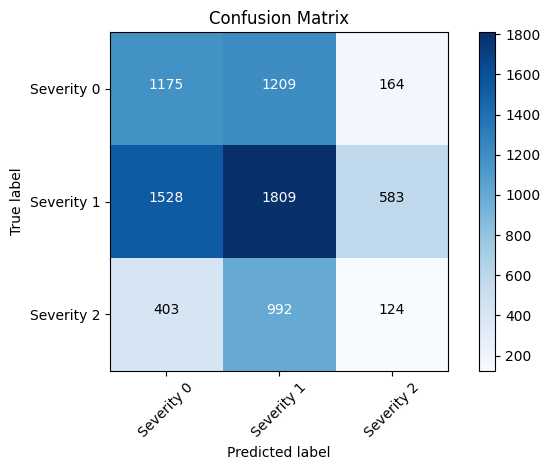

Balanced accuracy: 0.33475274725274723
Accuracy of the network on the 7987 test images: 38 %
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.46      0.42      2548
           1       0.45      0.46      0.46      3920
           2       0.14      0.08      0.10      1519

    accuracy                           0.39      7987
   macro avg       0.32      0.33      0.33      7987
weighted avg       0.37      0.39      0.38      7987



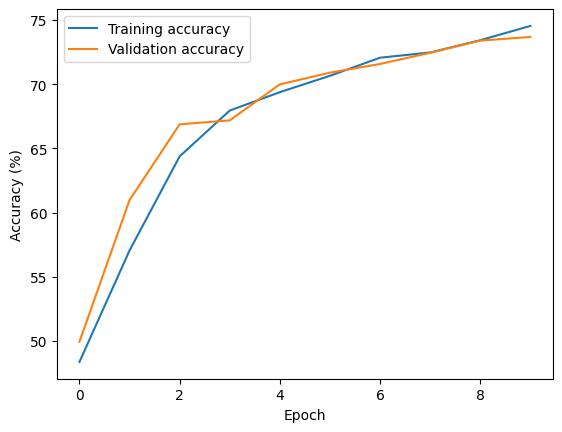

Train Accuracy:  [48.37894953868357, 57.05376011545797, 64.37812483892583, 67.94495129117055, 69.37786712025154, 70.65099737126953, 72.05814133292098, 72.46533683830731, 73.41889593319932, 74.53224060615432]
Validation Accuracy:  [49.94846423417852, 60.977118119975266, 66.87280972995259, 67.18202432488147, 69.98556998556998, 70.89259946402804, 71.57287157287158, 72.43867243867244, 73.38693052978768, 73.67553081838795]



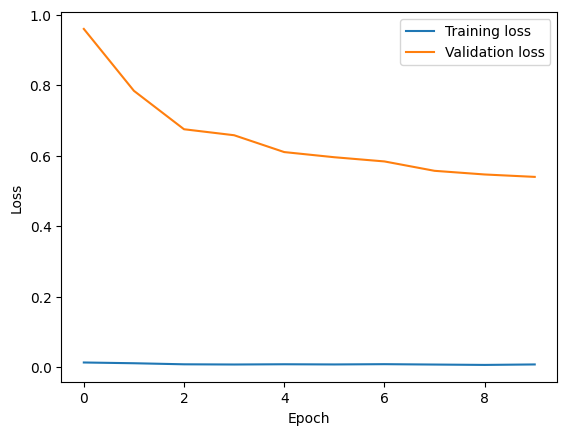

Train Losses:  [0.013011753166976728, 0.010873143021997652, 0.00786111190130836, 0.007290702607286603, 0.007982594500246801, 0.007452922922215964, 0.008232859796599337, 0.007169097661972046, 0.006105544241635423, 0.007462888858035991]
Validation Losses:  [0.9598462018517459, 0.7841266901240942, 0.6750642821681153, 0.6580741796339205, 0.610283500348089, 0.5956287668479199, 0.5837154954985181, 0.5570835594884196, 0.5466951699975445, 0.5398516730165216]



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, shuffle=True, test_size=0.2, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




# Test the Model

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()





# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



[0 0 0 ... 2 2 2]
7987
Class  0


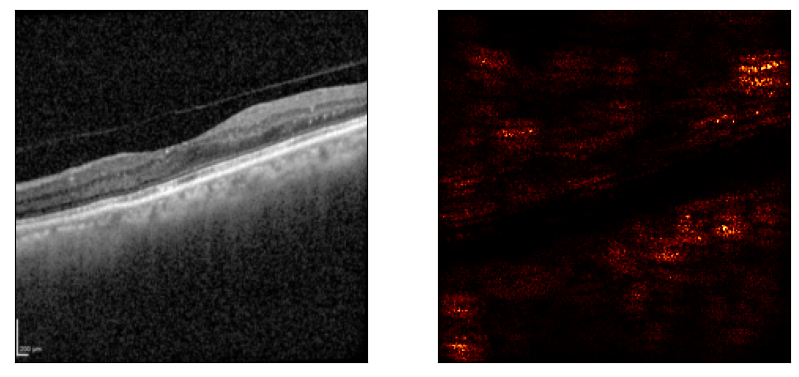

Class  1


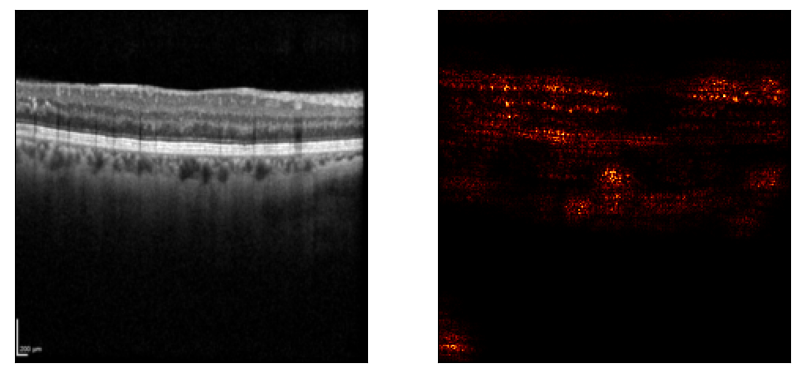

Class  2


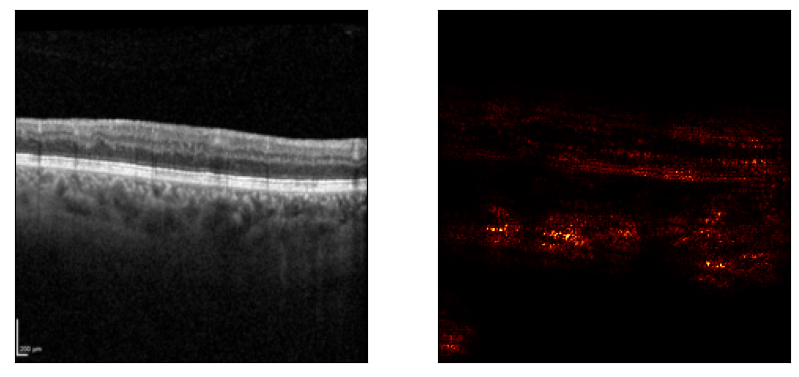

In [19]:
# Visualize
print(image_testset._labels)
print(len(image_testset))
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, alexnet)
print("Class ", image_testset[3000][1])
saliency_map(img2, alexnet)
print("Class ", image_testset[7986][1])
saliency_map(img3, alexnet)

## Original flip class 2

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.006
[1,   200] loss: 0.839
[1,   300] loss: 0.773
Train accuracy after epoch 1: 57.28 %
Validation accuracy after epoch 1: 62.31 %
Train loss after epoch 1: 0.13
Validation loss after epoch 1: 0.75
[2,   100] loss: 0.713
[2,   200] loss: 0.675
[2,   300] loss: 0.650
Train accuracy after epoch 2: 67.31 %
Validation accuracy after epoch 2: 69.18 %
Train loss after epoch 2: 0.11
Validation loss after epoch 2: 0.65
[3,   100] loss: 0.633
[3,   200] loss: 0.610
[3,   300] loss: 0.592
Train accuracy after epoch 3: 70.66 %
Validation accuracy after epoch 3: 72.13 %
Train loss after epoch 3: 0.10
Validation loss after epoch 3: 0.58
[4,   100] loss: 0.581
[4,   200] loss: 0.589
[4,   300] loss: 0.561
Train accuracy after epoch 4: 72.29 %
Validation accuracy after epoch 4: 73.31 %
Train loss after epoch 4: 0.10
Validation loss after epoch 4: 0.56
[5,   100] loss: 0.537
[5,   200] loss: 0.554
[5,   300] loss: 0.544
Train accuracy after epoch 5: 73.78 %
Valida

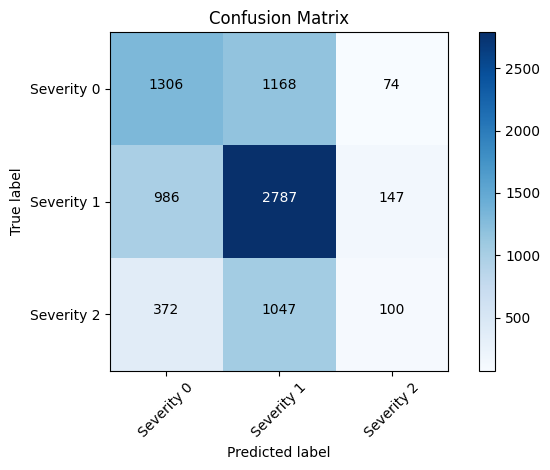

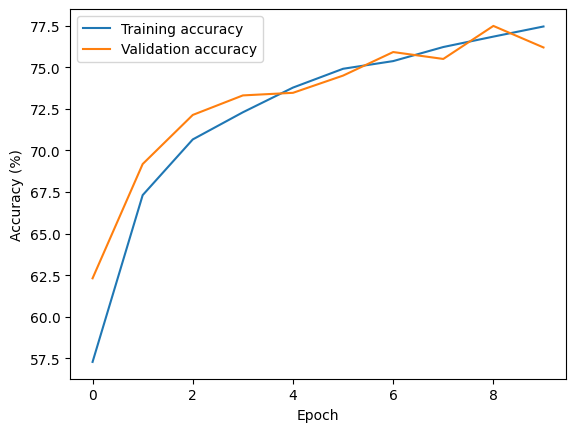

Train Accuracy:  [57.28285270246935, 67.31134519081333, 70.66137109307546, 72.2932136073217, 73.77827663615956, 74.90934208254187, 75.37126575720946, 76.21740632015197, 76.84337765498186, 77.45208081505785]
Validation Accuracy:  [62.31008287292818, 69.18162983425414, 72.13397790055248, 73.30801104972376, 73.46339779005525, 74.49930939226519, 75.91505524861878, 75.50069060773481, 77.48618784530387, 76.19129834254143]



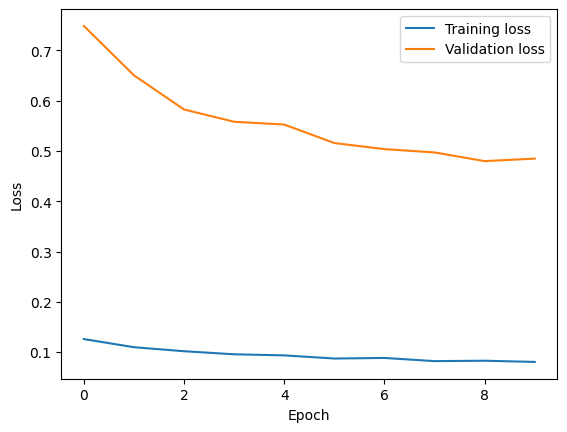

Train Losses:  [0.12585632873503544, 0.10963446733371987, 0.1016522120704967, 0.09553654870604941, 0.0934153717031795, 0.0871489408595786, 0.08828893262707727, 0.0819515230247329, 0.08276516750701883, 0.08038707110433947]
Validation Losses:  [0.7487452873208905, 0.6504960237945641, 0.5824789737469583, 0.5581118777311967, 0.5525464194914254, 0.5157983247087805, 0.5036804936208777, 0.49710614872242204, 0.47980580129017486, 0.48479511658789703]



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

concatenated_dataset1 = ConcatDataset([image_trainset, flip_trainset_class_2]) #ppends the original dtset set with the sme orginl dataset but flip and only thsoe in class 2 [og set, flipped og only class2]

raw_train_dataset = concatenated_dataset1
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, shuffle=True, test_size=0.2, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')







# Test the Model


alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



In [ ]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, alexnet)
print("Class ", image_testset[3000][1])
saliency_map(img2, alexnet)
print("Class ", image_testset[7986][1])
saliency_map(img3, alexnet)

## original + crop

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.033
[1,   200] loss: 1.018
[1,   300] loss: 0.993
[1,   400] loss: 0.922
[1,   500] loss: 0.854
[1,   600] loss: 0.811
Train accuracy after epoch 1: 53.15 %
Validation accuracy after epoch 1: 62.74 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 0.76
[2,   100] loss: 0.749
[2,   200] loss: 0.713
[2,   300] loss: 0.692
[2,   400] loss: 0.662
[2,   500] loss: 0.649
[2,   600] loss: 0.643
Train accuracy after epoch 2: 66.45 %
Validation accuracy after epoch 2: 68.13 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.66
[3,   100] loss: 0.627
[3,   200] loss: 0.607
[3,   300] loss: 0.601
[3,   400] loss: 0.597
[3,   500] loss: 0.602
[3,   600] loss: 0.576
Train accuracy after epoch 3: 70.57 %
Validation accuracy after epoch 3: 70.84 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.59
[4,   100] loss: 0.574
[4,   200] loss: 0.565
[4,   300] loss: 0.579
[4,   400] loss: 0.562
[4,   500] loss: 0.560
[4,   60

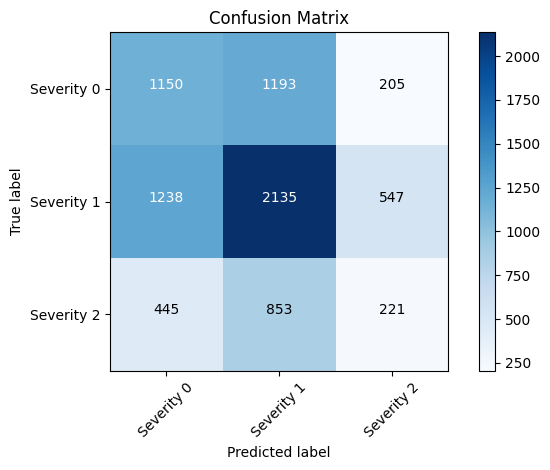

Balanced accuracy: 0.38048923043162675
Accuracy of the network on the 7987 test images: 43 %
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.45      0.43      2548
           1       0.51      0.54      0.53      3920
           2       0.23      0.15      0.18      1519

    accuracy                           0.44      7987
   macro avg       0.38      0.38      0.38      7987
weighted avg       0.42      0.44      0.43      7987



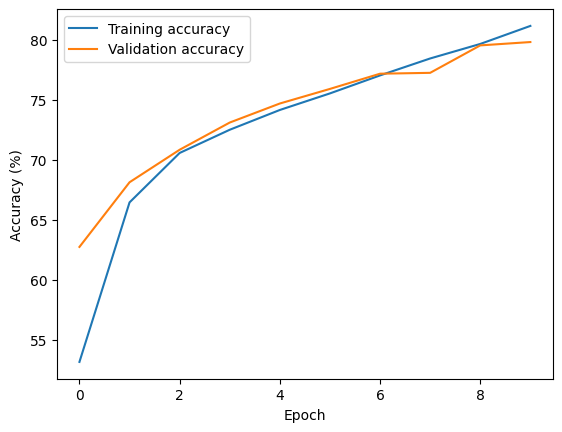

Train Accuracy:  [53.14795247790119, 66.44847047908667, 70.56928587995773, 72.5047032445945, 74.15406025307321, 75.53539674767416, 77.03528077725949, 78.4475427157694, 79.65878926887096, 81.16125041878205]
Validation Accuracy:  [62.735800432945055, 68.12699721678177, 70.83805793217194, 73.10586537470364, 74.69333058447583, 75.90970003092465, 77.17761055561283, 77.24976806514792, 79.53819193897536, 79.81651376146789]



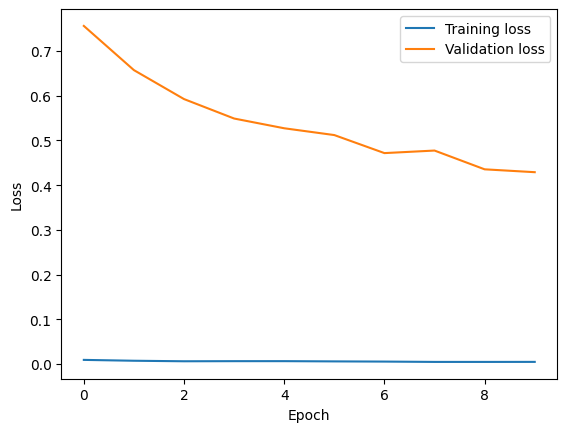

Train Losses:  [0.009244665871734871, 0.007320367229436532, 0.006166120533888187, 0.006398267908976145, 0.006421393087314813, 0.00588157527529231, 0.005454152920689968, 0.004717403228043332, 0.004697818266108165, 0.004785155493894951]
Validation Losses:  [0.7560367461160684, 0.657182981090292, 0.5924496781935386, 0.5489609607064028, 0.5271673005901039, 0.5119638943559127, 0.4716513733583165, 0.4773436173583144, 0.43537770524588754, 0.42896174947056204]



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

concatenated_dataset2 = ConcatDataset([image_trainset, crop_trainset]) 

raw_train_dataset = concatenated_dataset2
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, shuffle=True, test_size=0.2, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')


from sklearn.metrics import classification_report

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()





# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



In [ ]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, alexnet)
print("Class ", image_testset[3000][1])
saliency_map(img2, alexnet)
print("Class ", image_testset[7986][1])
saliency_map(img3, alexnet)

## Original + flip

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
Train accuracy after epoch 1: 51.19 %
Validation accuracy after epoch 1: 59.32 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 0.84
Train accuracy after epoch 2: 63.23 %
Validation accuracy after epoch 2: 65.94 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.70
Train accuracy after epoch 3: 68.24 %
Validation accuracy after epoch 3: 69.46 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.63
Train accuracy after epoch 4: 71.01 %
Validation accuracy after epoch 4: 70.89 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.60
Train accuracy after epoch 5: 72.90 %
Validation accuracy after epoch 5: 72.78 %
Train loss after epoch 5: 0.01
Validation loss after epoch 5: 0.57
Train accuracy after epoch 6: 74.47 %
Validation accuracy after epoch 6: 74.32 %
Train loss after epoch 6: 0.01
Validation loss after epoch 6: 0.54
Train accuracy after epoch 7: 76.37 %
Validation accuracy after epoch 7: 74.95 %
Train loss a

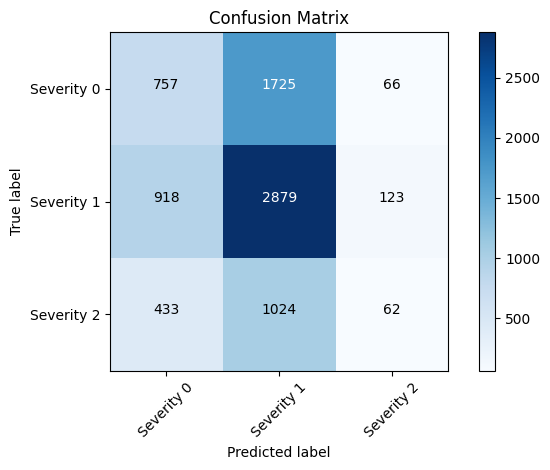

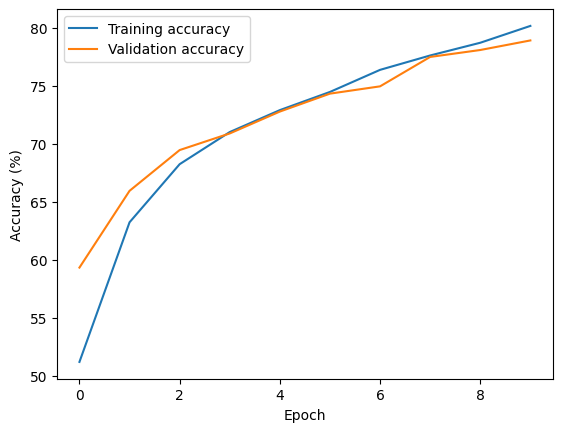

Train Accuracy:  [51.189341030332706, 63.229647192227404, 68.23956910548154, 71.00997345566064, 72.90157977475968, 74.46846893281447, 76.37296085354225, 77.61255573022704, 78.7104089889957, 80.16132773239183]
Validation Accuracy:  [59.32378105349964, 65.94165549943305, 69.45675703535719, 70.8895990104113, 72.77600247397176, 74.32223482115246, 74.95103597567261, 77.48685702504896, 78.0847335326255, 78.90939078445521]



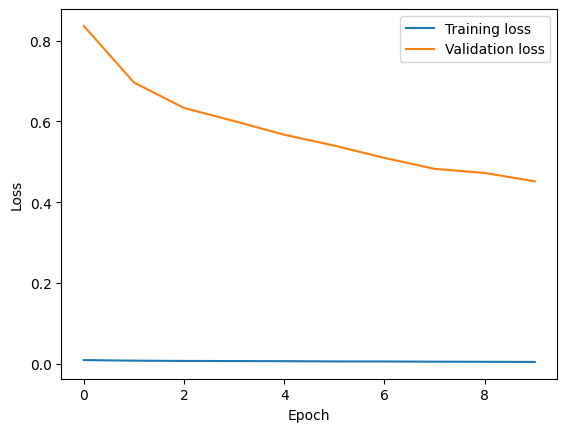

Train Losses:  [0.009474630312628959, 0.008031591552093355, 0.007363769230379107, 0.0070509519765561655, 0.006749129766687334, 0.0061441382525191076, 0.006025769516113759, 0.005512662342392043, 0.005232781859166933, 0.0049210717591658066]
Validation Losses:  [0.836402112381346, 0.6964341341226498, 0.6334001264637518, 0.6009829556520495, 0.5671208132457369, 0.5401977084553274, 0.5098357535418672, 0.4827620031268139, 0.47260320431767583, 0.4519169047749813]



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

concatenated_dataset2 = ConcatDataset([image_trainset, flip_trainset]) 

raw_train_dataset = concatenated_dataset2
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, shuffle=True, test_size=0.2, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')


from sklearn.metrics import classification_report

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()





# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)


# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



In [ ]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, alexnet)
print("Class ", image_testset[3000][1])
saliency_map(img2, alexnet)
print("Class ", image_testset[7986][1])
saliency_map(img3, alexnet)

## Cropped


Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.033
[1,   200] loss: 0.997
[1,   300] loss: 0.916
Train accuracy after epoch 1: 50.24 %
Validation accuracy after epoch 1: 56.90 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 0.86
[2,   100] loss: 0.831
[2,   200] loss: 0.789
[2,   300] loss: 0.760
Train accuracy after epoch 2: 60.79 %
Validation accuracy after epoch 2: 64.21 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.75
[3,   100] loss: 0.722
[3,   200] loss: 0.690
[3,   300] loss: 0.677
Train accuracy after epoch 3: 66.42 %
Validation accuracy after epoch 3: 67.45 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.67
[4,   100] loss: 0.653
[4,   200] loss: 0.649
[4,   300] loss: 0.634
Train accuracy after epoch 4: 68.76 %
Validation accuracy after epoch 4: 69.70 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.62
[5,   100] loss: 0.617
[5,   200] loss: 0.603
[5,   300] loss: 0.618
Train accuracy after epoch 5: 70.26 %
Valida

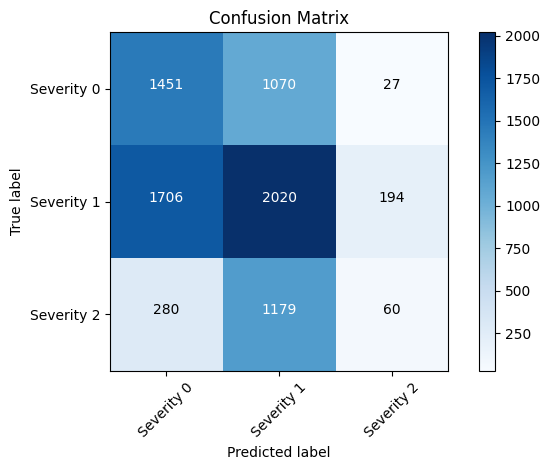

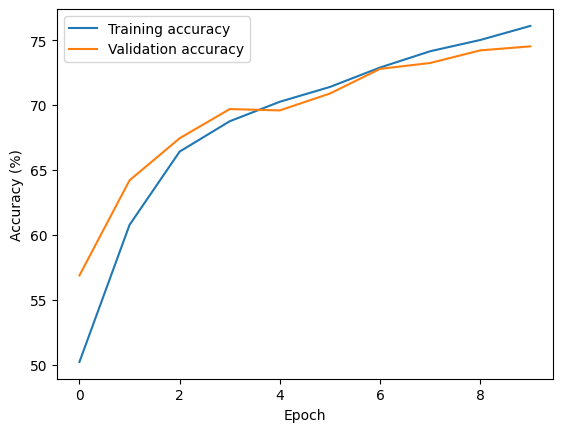

Train Accuracy:  [50.23967836709448, 60.78552651925158, 66.42441111282923, 68.75934230194319, 70.25926498634091, 71.39838152672543, 72.89314983763724, 74.14566259471161, 75.01159734034329, 76.09401577238286]
Validation Accuracy:  [56.89548546691404, 64.21356421356421, 67.45001030715316, 69.6969696969697, 69.59389816532673, 70.89259946402804, 72.78911564625851, 73.24263038548753, 74.21150278293135, 74.52071737786024]



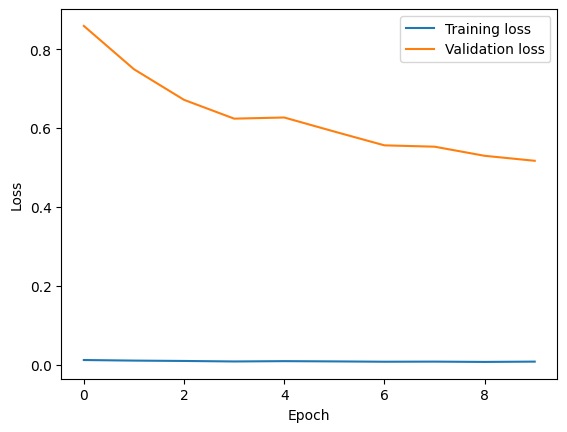

Train Losses:  [0.011498946304384031, 0.01003732944005414, 0.009129829508693595, 0.007839870394060486, 0.008644976898243553, 0.007994519056458222, 0.007178765868670062, 0.007454158738255501, 0.006682111832656358, 0.007463231290641584]
Validation Losses:  [0.8593508835503353, 0.7495250524478803, 0.6717776185924111, 0.6240471373683668, 0.6269711041740476, 0.5912580214513009, 0.5562885367263349, 0.5528969503117453, 0.5297449074487445, 0.5171097374851987]



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = crop_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, shuffle=True, test_size=0.2, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')



# Test the Model

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



In [ ]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, alexnet)
print("Class ", image_testset[3000][1])
saliency_map(img2, alexnet)
print("Class ", image_testset[7986][1])
saliency_map(img3, alexnet)

# Learning Rate Comparison

## lr = 0.00001

In [4]:
balanced_accuracy_random_states = []

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.041
[1,   200] loss: 1.027
[1,   300] loss: 1.019
Train accuracy after epoch 1: 48.28 %
Validation accuracy after epoch 1: 47.66 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.01
[2,   100] loss: 0.996
[2,   200] loss: 0.969
[2,   300] loss: 0.946
Train accuracy after epoch 2: 50.66 %
Validation accuracy after epoch 2: 54.57 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.92
[3,   100] loss: 0.915
[3,   200] loss: 0.891
[3,   300] loss: 0.869
Train accuracy after epoch 3: 56.28 %
Validation accuracy after epoch 3: 58.75 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.85
[4,   100] loss: 0.854
[4,   200] loss: 0.841
[4,   300] loss: 0.821
Train accuracy after epoch 4: 59.25 %
Validation accuracy after epoch 4: 61.57 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.80
[5,   100] loss: 0.810
[5,   200] loss: 0.802
[5,   300] loss: 0.785
Train accuracy after epoch 5: 61.25 %
Valida

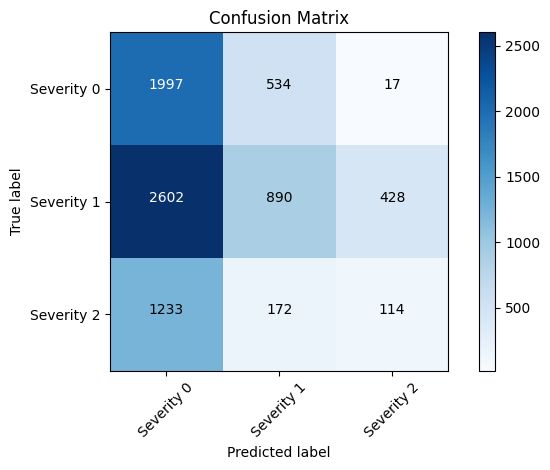

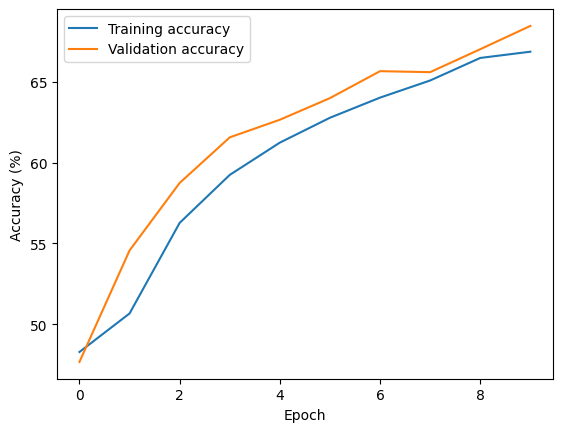

Train Accuracy:  [48.275862068965516, 50.662336992938506, 56.275449719086645, 59.24952322045255, 61.249420132982834, 62.79057780526777, 64.03793618885625, 65.09973712695222, 66.49657234163188, 66.88315035307458]
Validation Accuracy:  [47.660276231704806, 54.566068851783136, 58.750773036487324, 61.574933003504434, 62.66749123891981, 64.00742115027829, 65.67717996289424, 65.61533704390847, 67.03772418058132, 68.48072562358277]



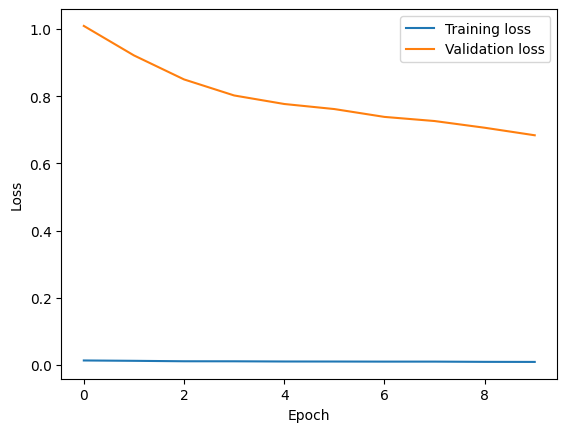

Train Losses:  [0.013327801698132566, 0.012265420077662719, 0.01094537169525498, 0.010845610185673362, 0.010244914575626976, 0.010141860693693161, 0.009889384633616397, 0.009903424468479659, 0.009194751123064443, 0.008986696600914001]
Validation Losses:  [1.0094292656192336, 0.9216620021936844, 0.8501400269446632, 0.8023858859450074, 0.776988117996134, 0.7618796886967226, 0.7385188093556003, 0.7262476715592349, 0.7062780539833671, 0.6838191688195918]



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = crop_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=0, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.00001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




# Test the Model

alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_acc)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



# lr = 0.0001

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.032
[1,   200] loss: 0.988
[1,   300] loss: 0.908
Train accuracy after epoch 1: 50.82 %
Validation accuracy after epoch 1: 56.28 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 0.87
[2,   100] loss: 0.849
[2,   200] loss: 0.797
[2,   300] loss: 0.756
Train accuracy after epoch 2: 60.71 %
Validation accuracy after epoch 2: 64.40 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.73
[3,   100] loss: 0.718
[3,   200] loss: 0.701
[3,   300] loss: 0.677
Train accuracy after epoch 3: 66.25 %
Validation accuracy after epoch 3: 67.35 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.67
[4,   100] loss: 0.663
[4,   200] loss: 0.645
[4,   300] loss: 0.634
Train accuracy after epoch 4: 68.39 %
Validation accuracy after epoch 4: 69.80 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.64
[5,   100] loss: 0.628
[5,   200] loss: 0.618
[5,   300] loss: 0.603
Train accuracy after epoch 5: 69.85 %
Valida

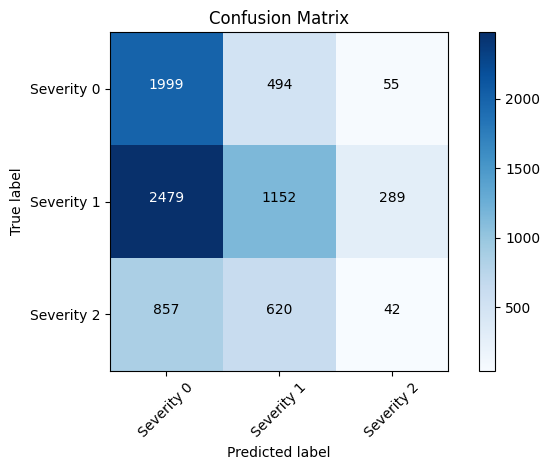

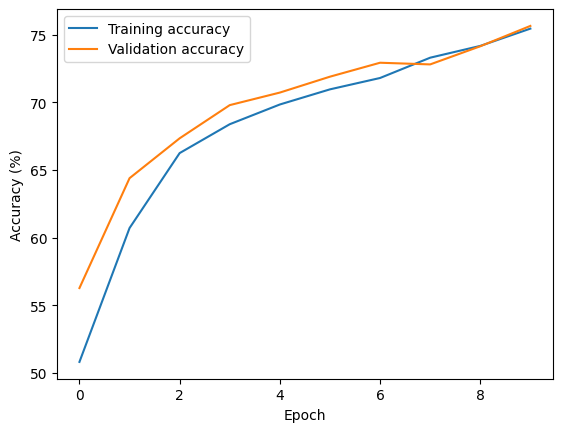

Train Accuracy:  [50.81696819751559, 60.71336529044895, 66.25431678779444, 68.3882274109582, 69.84691510746869, 70.96541415390959, 71.80557703211174, 73.30549971650946, 74.17658883562703, 75.45487346013093]
Validation Accuracy:  [56.277056277056275, 64.39909297052154, 67.34693877551021, 69.80004122861266, 70.7276850133993, 71.90270047412905, 72.93341579055864, 72.80972995258709, 74.14965986394557, 75.6545042259328]



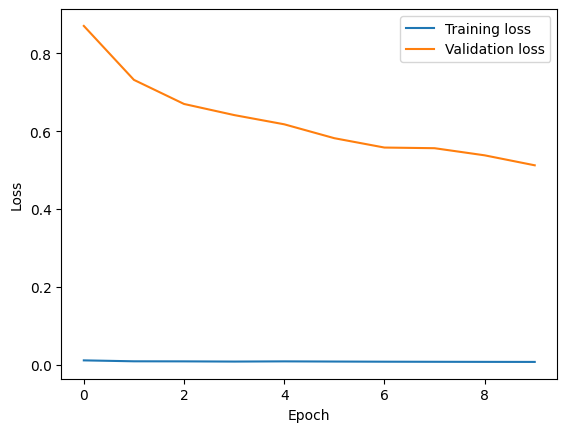

Train Losses:  [0.01114174194241825, 0.008761237326421235, 0.008580149200401808, 0.008052975919685866, 0.008577963043200342, 0.008117390012270525, 0.007728500683840953, 0.007495236043867312, 0.007296456710288399, 0.00715887026959344]
Validation Losses:  [0.8707588893240247, 0.7321118804578363, 0.6701765784379797, 0.6416487900701117, 0.6179067709106338, 0.5821942224548763, 0.558139144931963, 0.5564755355665497, 0.538160871695155, 0.5125064124546943]



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = crop_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=0, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




# Test the Model


alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_acc)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



## LR = 0.001

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.119
[1,   200] loss: 1.036
[1,   300] loss: 1.034
Train accuracy after epoch 1: 47.48 %
Validation accuracy after epoch 1: 48.48 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.03
[2,   100] loss: 1.034
[2,   200] loss: 1.033
[2,   300] loss: 1.039
Train accuracy after epoch 2: 48.49 %
Validation accuracy after epoch 2: 48.48 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 1.04
[3,   100] loss: 1.034
[3,   200] loss: 1.032
[3,   300] loss: 1.039
Train accuracy after epoch 3: 48.49 %
Validation accuracy after epoch 3: 48.48 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 1.03
[4,   100] loss: 1.034
[4,   200] loss: 1.031
[4,   300] loss: 1.038
Train accuracy after epoch 4: 48.49 %
Validation accuracy after epoch 4: 48.48 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 1.04
[5,   100] loss: 1.034
[5,   200] loss: 1.032
[5,   300] loss: 1.038
Train accuracy after epoch 5: 48.49 %
Valida

c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


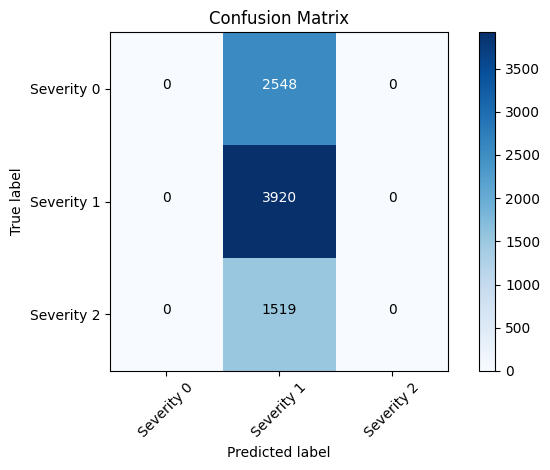

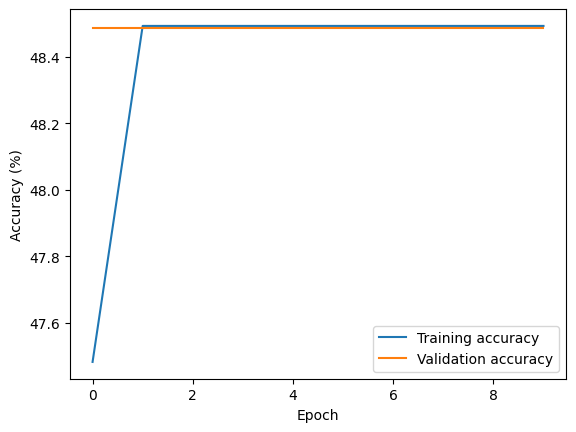

Train Accuracy:  [47.48208855213649, 48.492345755373435, 48.492345755373435, 48.492345755373435, 48.492345755373435, 48.492345755373435, 48.492345755373435, 48.492345755373435, 48.492345755373435, 48.492345755373435]
Validation Accuracy:  [48.484848484848484, 48.484848484848484, 48.484848484848484, 48.484848484848484, 48.484848484848484, 48.484848484848484, 48.484848484848484, 48.484848484848484, 48.484848484848484, 48.484848484848484]



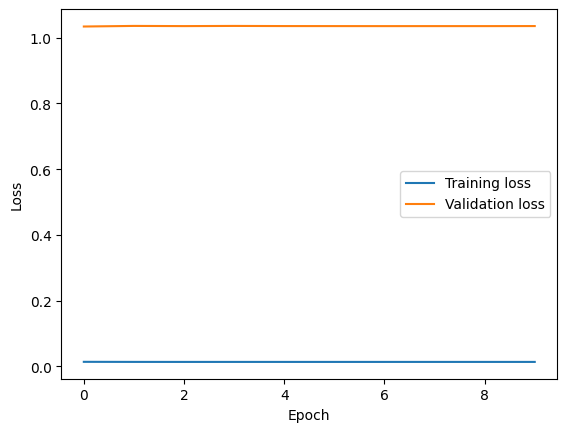

Train Losses:  [0.013930921883959519, 0.013710483124381617, 0.013645063497518239, 0.01367942988872528, 0.013670098624731364, 0.013668676740244814, 0.013668848887870186, 0.01367224047058507, 0.01367449015378952, 0.013670911522288071]
Validation Losses:  [1.0337243516330645, 1.0355262506428367, 1.034987252315426, 1.035498993860228, 1.0350946049866199, 1.0350115454533595, 1.034929723917541, 1.0349677517792044, 1.0349496397080555, 1.035117422937241]



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = crop_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=0, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')





# Train the Model


alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_acc)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



## lr = 0.01

Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 11440.578
[1,   200] loss: 1.854
[1,   300] loss: 1.101
Train accuracy after epoch 1: 44.52 %
Validation accuracy after epoch 1: 48.42 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.04
[2,   100] loss: 1.057
[2,   200] loss: 1.115
[2,   300] loss: 1.065
Train accuracy after epoch 2: 46.98 %
Validation accuracy after epoch 2: 48.48 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 1.04
[3,   100] loss: 4.698
[3,   200] loss: 1.044
[3,   300] loss: 1.047
Train accuracy after epoch 3: 46.39 %
Validation accuracy after epoch 3: 48.48 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 1.04
[4,   100] loss: 1.040
[4,   200] loss: 1.039
[4,   300] loss: 1.044
Train accuracy after epoch 4: 47.96 %
Validation accuracy after epoch 4: 47.76 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 1.04
[5,   100] loss: 1.043
[5,   200] loss: 1.036
[5,   300] loss: 1.042
Train accuracy after epoch 5: 48.02 %
Va

c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


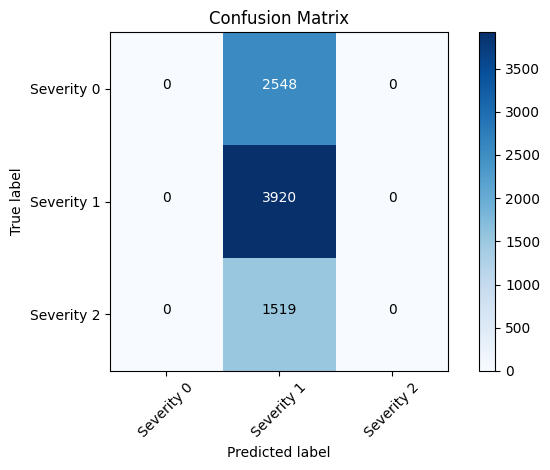

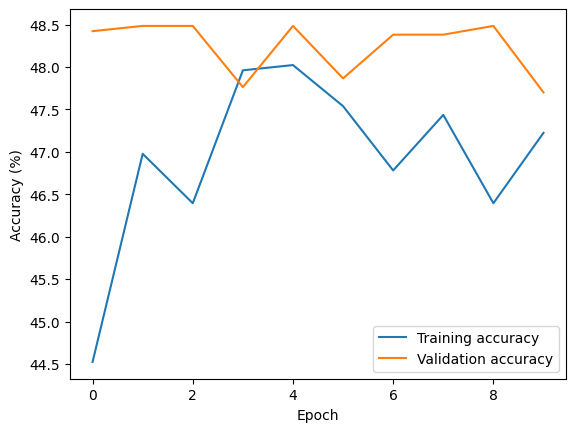

Train Accuracy:  [44.523478171228284, 46.976959950518015, 46.394515746611, 47.96144528632545, 48.02329776815628, 47.53878666048142, 46.78109375805371, 47.435699190763366, 46.394515746611, 47.22436987784135]
Validation Accuracy:  [48.42300556586271, 48.484848484848484, 48.484848484848484, 47.76334776334777, 48.484848484848484, 47.86641929499072, 48.381776953205524, 48.381776953205524, 48.484848484848484, 47.701504844361985]



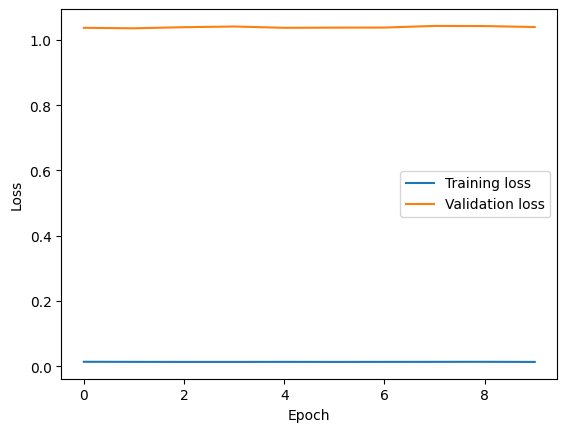

Train Losses:  [0.014023005766303916, 0.013742237891021528, 0.013616235240509636, 0.013604652724767985, 0.013750463724136353, 0.013621315556137185, 0.013709337695648796, 0.013798840147884269, 0.013906443589612058, 0.013563959614226693]
Validation Losses:  [1.0369167024389883, 1.035457607078395, 1.0387875733732366, 1.040928542749141, 1.0369033232297487, 1.0375088540531143, 1.037705949866091, 1.042718213124512, 1.0423016250563562, 1.039295159106745]



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = crop_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=0, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.01
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




#Test the Model


alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_acc)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



## lr = 0.1

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Data Has Split
Beginning Training
[1,   100] loss: 52199959482.314
[1,   200] loss: 153424.906
[1,   300] loss: 92030.098
Train accuracy after epoch 1: 44.69 %
Validation accuracy after epoch 1: 48.36 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 13317.73
[2,   100] loss: 4661.215
[2,   200] loss: 7495.925
[2,   300] loss: 15076.256
Train accuracy after epoch 2: 48.40 %
Validation accuracy after epoch 2: 48.42 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 3192.91
[3,   100] loss: 2870.960
[3,   200] loss: 4941.093
[3,   300] loss: 3377.651
Train accuracy after epoch 3: 48.42 %
Validation accuracy after epoch 3: 48.48 %
Train loss after epoch 3: 3.97
Validation loss after epoch 3: 4604.77
[4,   100] loss: 1279.056
[4,   200] loss: 2506.762
[4,   300] loss: 2124.420
Train accuracy after epoch 4: 48.44 %
Validation accuracy after epoch 4: 48.44 %
Train loss after epoch 4: 564.78
Validation loss after epoch 4: 13116.89
[5,   100] loss: 6003.505
[5,   200

c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


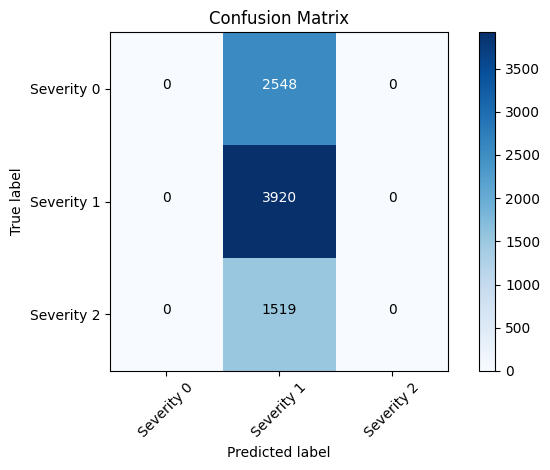

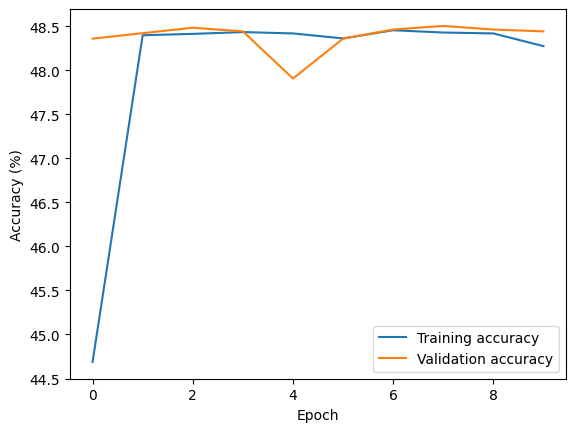

Train Accuracy:  [44.68841812277718, 48.39956703262718, 48.41503015308489, 48.4356476470285, 48.42018452657079, 48.36348641822587, 48.456265140972114, 48.4304932735426, 48.42018452657079, 48.275862068965516]
Validation Accuracy:  [48.361162646876934, 48.42300556586271, 48.484848484848484, 48.4436198721913, 47.907647907647906, 48.361162646876934, 48.464234178519895, 48.505462791177074, 48.464234178519895, 48.4436198721913]



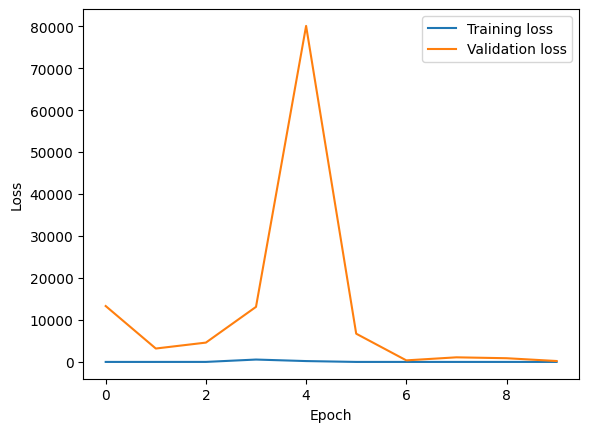

Train Losses:  [0.013618712362490203, 0.013548997083776876, 3.9727431669047006, 564.7849895318872, 202.36395965085217, 0.013699023347151907, 0.013729619352441085, 0.013738275750687248, 0.013741512439752879, 0.013750739003482618]
Validation Losses:  [13317.731276408123, 3192.9079255150705, 4604.773370103427, 13116.88658415905, 80065.29183687482, 6726.627462214845, 370.49214121703636, 1094.402359875815, 881.6962246582008, 216.37370759085314]



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

raw_train_dataset = crop_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=0, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.1
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')





# Test the Model


alexnet.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_accuracy_random_states.append(balanced_acc)

# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()



# Balanced Accuracy vs Learning Rate

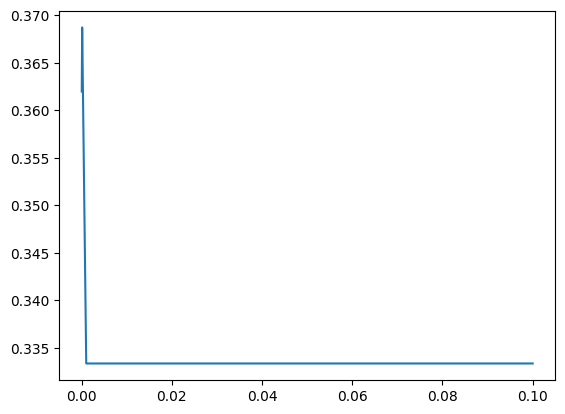

In [10]:
plt.plot([0.00001,0.0001,0.001,0.01,0.1], balanced_accuracy_random_states)